# 9번 문제

### 지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인(Type III Anova 사용)

1.귀무가설과 대립가설 설정하라


가. 상호작용효과 검정에 대한 가설

- 귀무가설 H0: 지하철 호선과 월별, 승객 수 간 상관관계가 없다.
- 대립가설 H1: 지하철 호선과 월별, 승객 수 간 상관관계가 있다.



나. 주효과 검정에 대한 가설

- 귀무가설 H0: 지하철 호선 승객 수 차이는 존재하지 않는다.
- 대립가설 H1: 지하철 호선 승객 수 차이는 존재한다.

- 귀무가설 H0: 월별 승객 수 차이는 존재하지 않는다.
- 대립가설 H1: 월별승객 수 차이는  차이는 존재한다.




In [1]:
import pandas as pd 
df = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem9.csv")
df

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301
...,...,...,...
67,3,8,1365
68,3,9,1374
69,3,10,1337
70,3,11,1332


In [2]:
## 분산분석 수행 

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'total ~C(line)*C(month)' 
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,3.466344e+06,1.0,33455.335657,4.849033e-55
C(line),1.336630e+05,2.0,645.022520,6.417946e-29
C(month),3.942483e+04,11.0,34.591616,7.896179e-16
C(line):C(month),9.696908e+04,22.0,42.540665,1.582232e-19
Residual,3.730000e+03,36.0,NaN,NaN


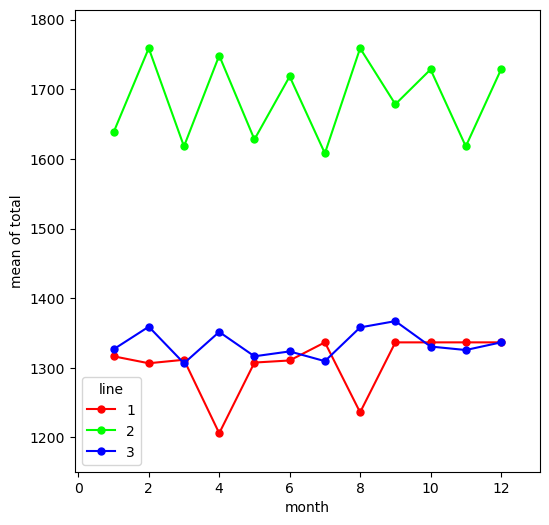

In [20]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

## Series로 변경 
total = df["total"]
line = df["line"]
month = df["month"]

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(month,line, total,ms=10, ax=ax)

### 결론 : 교호작용이 존재한다. 

1. 결과 테이블의 C(line):C(month)를보면 서로의 차이를 총분산으로 설명하는 F- value에 대한 P-value가 0.05보다 작다. 즉, 둘의 상관관계는 존재한다. 

* 일반적으로 상호작용 그래프에서 두 선이 서로 교차하고 있을 시에는 x축에 있는 독립변수와 그래프에서 시각화된 독립변수 간에는 상호작용이 존재한다고 해석할 수 있다.